# The Sparks Foundation (Data Science & Business Analytics Task)
# Task 2
# Prediction Using Unsupervised ML
#### Predict the optimum number of clusters and represent it virtually.
<h3>Created By :- Kshitij Barnwal</h3>

# Step 1: Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics

sns.set_style("darkgrid")

# Step 2 : Importing the Dataset

In [2]:
iris= datasets.load_iris()
print('Data:', iris.data)
print('Feature Names:', iris.feature_names)
print('Target Names:', iris.target_names)

Data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 

In [3]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
iris_df.shape

(150, 4)

In [7]:
iris_df.duplicated().sum()

1

In [8]:
df = iris_df.drop_duplicates()

In [9]:
df.shape

(149, 4)

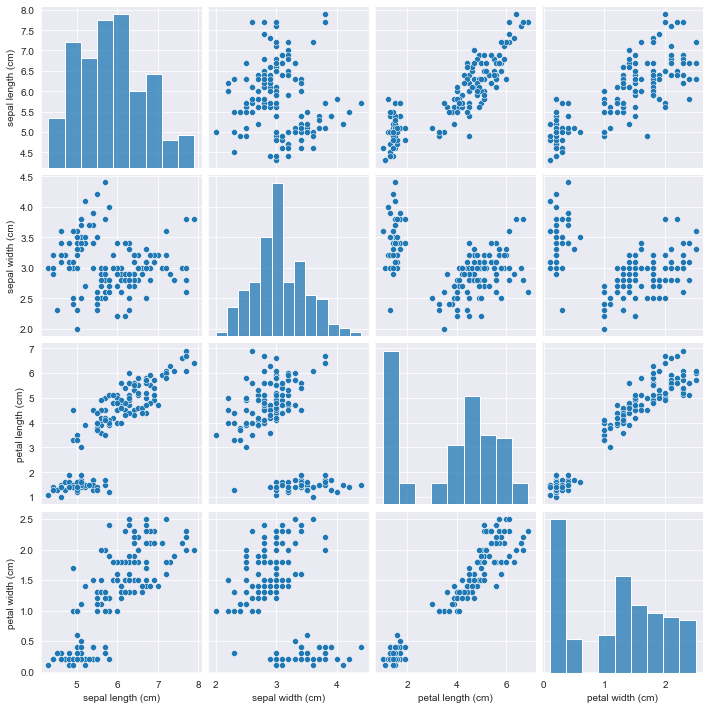

In [10]:
sns.pairplot(df,palette='Dark2')

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kshit\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kshit\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kshit\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

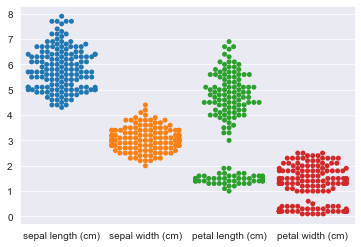

In [11]:
sns.swarmplot(data=df)

<AxesSubplot:>

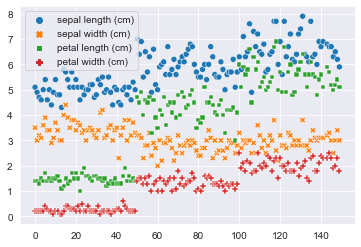

In [12]:
sns.scatterplot(data=df)

# Step 3 : Clustering With K-Means

In [13]:
X = df.iloc[:, [0, 1, 2, 3]].values
wcss = []  ##Array within cluster sum of squares.

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
kmeans.cluster_centers_

array([[6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.1       , 3.51304348, 1.52608696, 0.27391304],
       [5.58      , 2.65      , 4.03      , 1.235     ],
       [6.04117647, 2.73529412, 5.02352941, 1.78823529],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [4.67894737, 3.08421053, 1.37894737, 0.2       ],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [6.05384615, 2.83846154, 4.43846154, 1.39230769],
       [5.5125    , 4.        , 1.475     , 0.275     ],
       [6.65454545, 3.04545455, 4.66363636, 1.47272727]])

In [15]:
kmeans.labels_

array([1, 5, 5, 5, 1, 8, 5, 1, 5, 5, 8, 1, 5, 5, 8, 8, 8, 1, 8, 1, 1, 1,
       5, 1, 1, 5, 1, 1, 1, 5, 5, 1, 8, 8, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1,
       1, 5, 1, 5, 1, 1, 9, 9, 9, 2, 9, 7, 9, 6, 9, 2, 6, 7, 2, 7, 2, 9,
       7, 2, 7, 2, 3, 7, 3, 7, 7, 9, 9, 9, 7, 2, 2, 2, 2, 3, 2, 7, 9, 7,
       2, 2, 2, 7, 2, 6, 2, 2, 2, 7, 6, 2, 0, 3, 4, 0, 0, 4, 2, 4, 0, 4,
       0, 3, 0, 3, 3, 0, 0, 4, 4, 3, 0, 3, 4, 3, 0, 4, 3, 3, 0, 4, 4, 4,
       0, 3, 3, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3])

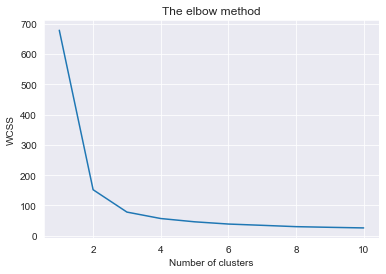

In [16]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. Thus, the optimum number of clusters is where the elbow occurs, which in this case is 3.

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(X)

In [18]:
kmeans.cluster_centers_

array([[5.90327869, 2.74918033, 4.38196721, 1.42622951],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [19]:
kmeans.cluster_centers_[:, 0]

array([5.90327869, 5.006     , 6.85      ])

In [20]:
kmeans.cluster_centers_[:, 1]

array([2.74918033, 3.428     , 3.07368421])

In [21]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

## Step 4 : Cluster Visualization using Centroids

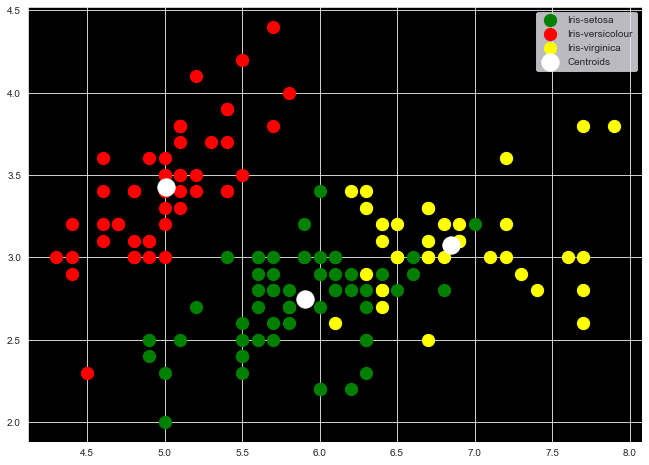

In [22]:
plt.figure(figsize=(11,8))
plt.axes().set_facecolor('black')
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 150, c = 'green', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 150, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 150, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'white', label = 'Centroids')
plt.legend()